In [1]:
import pandas as pd
pd.__version__

u'0.18.1'

In [2]:
df = pd.read_csv('data/train.csv')

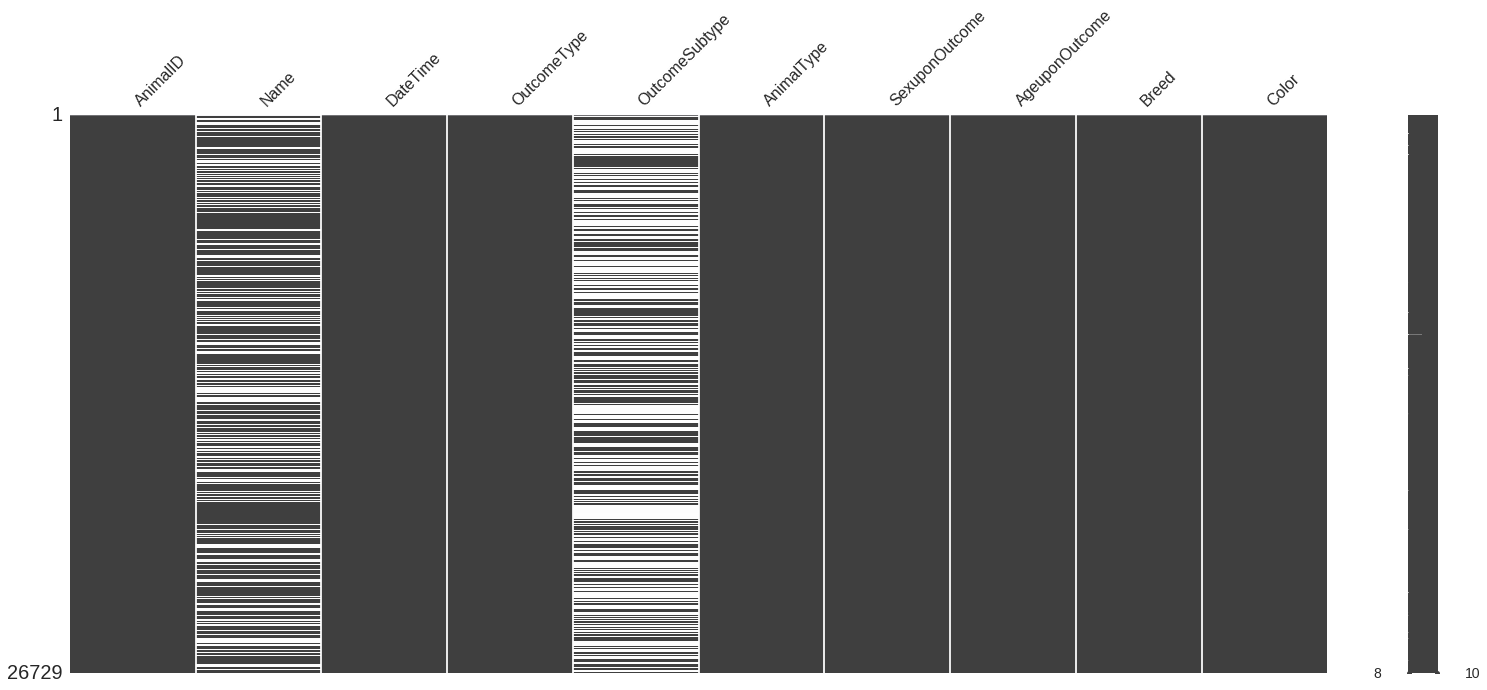

In [3]:
# More on missingno package: http://www.residentmar.io/2016/03/28/missingno.html
import missingno as mn
%matplotlib inline
mn.matrix(df)

In [4]:
# From a visual inspection of the matrix, it is clear that there are only two columns with a considerable
# number of missing values: Name and Outcome Subtype.

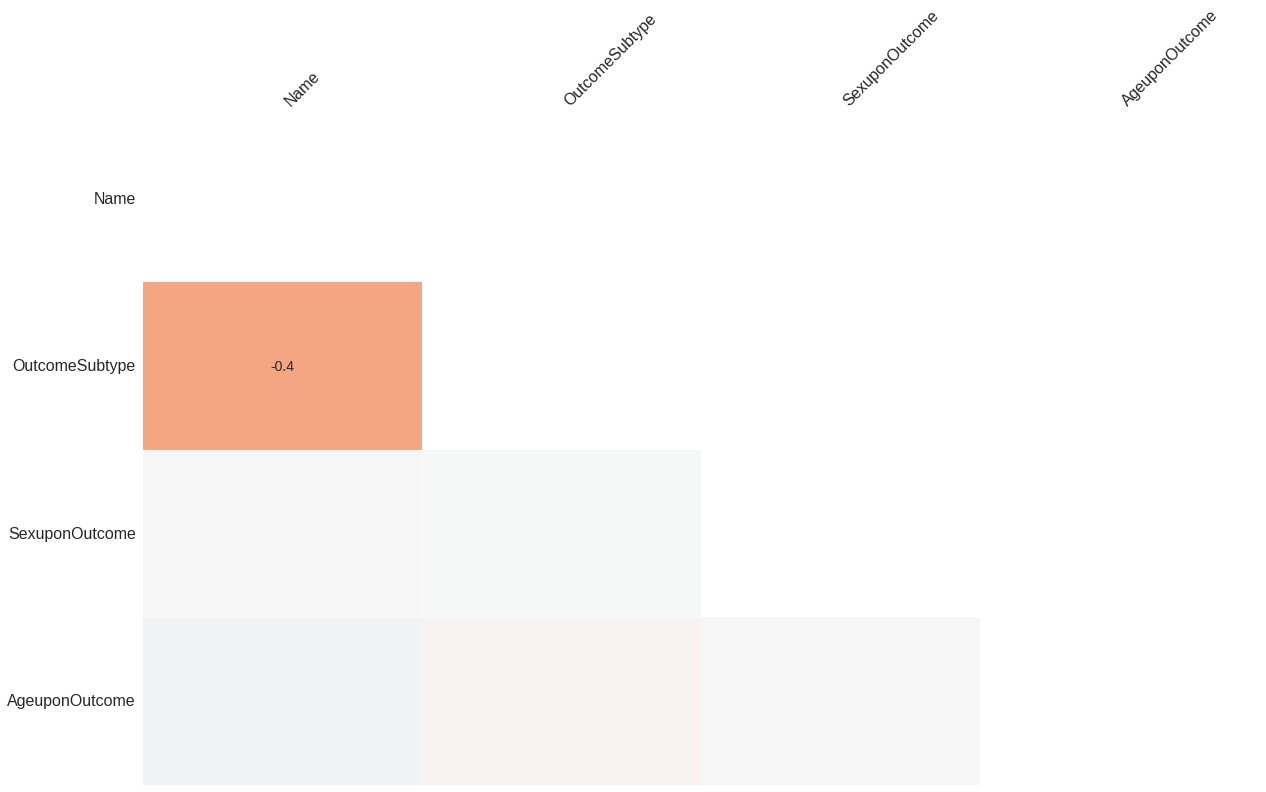

In [5]:
# We can inspect the relationship of missing values between these two variables by looking at the heatmap which 
# shows the "nullity correlation"
mn.heatmap(df)

In [6]:
# Any columns that are 100% populated do not show up in this matrix, which is why we see the 4 columns that we do. While
# it's not visible that there are missing values for SexuponOutcome and AgeuponOutcome from the matrix visualization
# above, their presence here is a sure indicator.

# We see the correlation value of -0.4 between the Name and OutcomeSubtype columns. A correlation of -1 means if one 
# column has a value, the other NEVER has a value. A correlation of 1 means if one column has a value the other 
# ALWAYS has a value. The value we see between Name and OutcomeSubtype means roughly: more often than not, animals
# that have a name do not have an OutcomeSubtype.

# There are two other columns we didn't expect to see in the heatmap: SexuponOutcome and AgeuponOutcome. If there
# are shaded boxes in the heatmap with no numbers, that means the correlation is very close to (but not exactly) 0, 
# meaning there is no relationship at all between the presense of the variables. In this case, and based upon the fact 
# we didn't see missing values for these columns in the matrix, we can assume there are a small number of missing values
# for these columns and they're randomly distributed.

print df[pd.isnull(df.SexuponOutcome)]
print df[~pd.isnull(df.Name) & pd.isnull(df.AgeuponOutcome)]

     AnimalID   Name             DateTime      OutcomeType OutcomeSubtype  \
3174  A667395  Diego  2013-11-27 16:11:00  Return_to_owner            NaN   

     AnimalType SexuponOutcome AgeuponOutcome      Breed        Color  
3174        Dog            NaN        7 years  Dachshund  Brown Merle  
Empty DataFrame
Columns: [AnimalID, Name, DateTime, OutcomeType, OutcomeSubtype, AnimalType, SexuponOutcome, AgeuponOutcome, Breed, Color]
Index: []


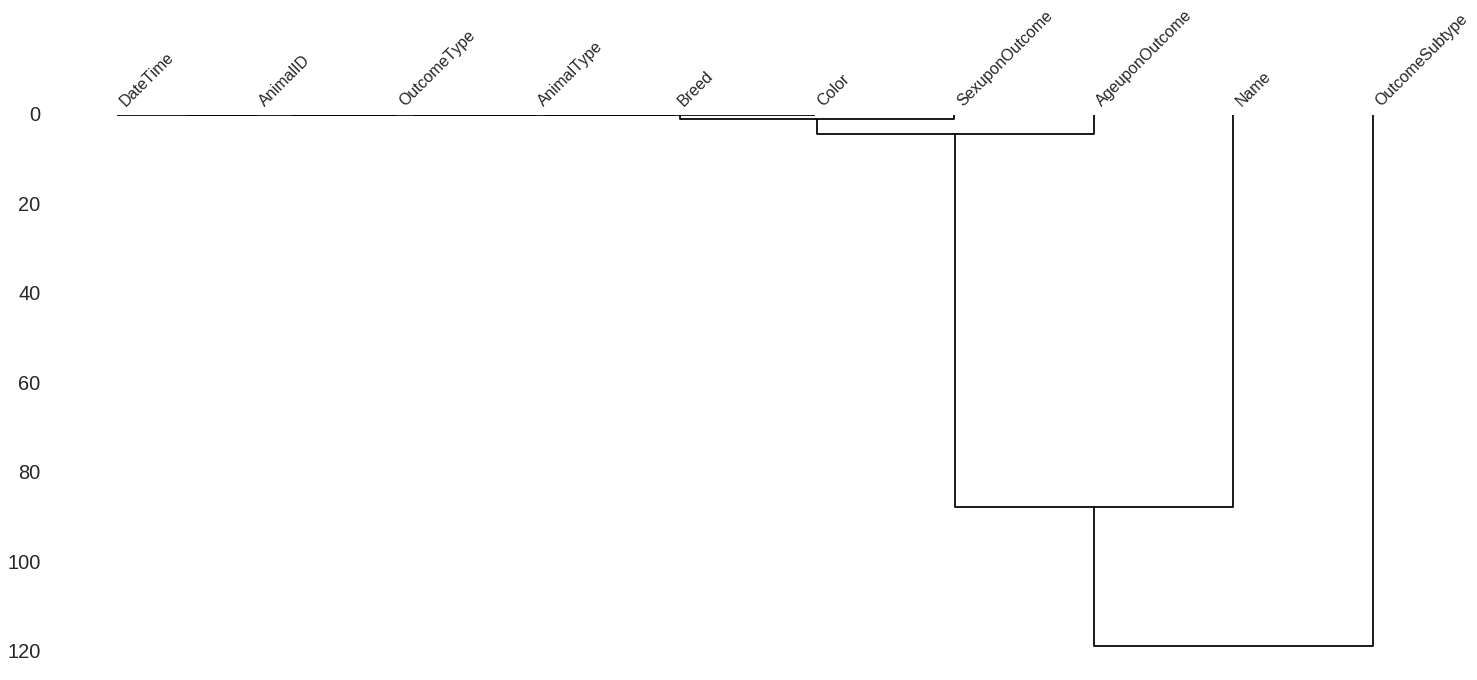

In [7]:
mn.dendrogram(df)